# WeatherPy
Observations:
1. As the latitude moves away from the equator the temperature also decreases
2. Looking at the Humidity and latitude there is no correlation
3. Looking at the cloudiness and latitude there is no correlation 
4. There are lot more land masses in Northern Hemisphere than Southern Hemisphere

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#city data
available_cities = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_counter = 0
set_counter = 1

# loops for creating dataframe columns
for city in cities:
    try:
        #handle spaces in city names
        response = requests.get(query_url + city.replace(" ","&")).json()
        
        #gather city data
        #available_cities.append(city)
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_counter > 48:
            count_counter = 1
            set_counter += 1
            available_cities.append(city)
        else:
            count_counter += 1
            available_cities.append(city)
        print(f"Processing Record {count_counter} of Set {set_counter} | {city}")
    except Exception:
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | barentu
Processing Record 3 of Set 1 | sao filipe
City not found. Skipping...
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | marawi
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | komsomolskiy
Processing Record 16 of Set 1 | bomi
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | ocos
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | hilo
Processing Record 23 of Set 1 | rocha
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create city data DataFrame
available_city_data = {
    "City":available_cities,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

#Print available city data count
print("City\t\t" + str(len(available_cities)))
print("Cloudiness\t" + str(len(cloudinesses)))
print("Country\t\t" + str(len(countries)))
print("Date\t\t" + str(len(dates)))
print("Humidity\t" + str(len(humidities)))
print("Lat\t\t" + str(len(lats)))
print("Lng\t\t" + str(len(lngs)))
print("Max Temp\t" + str(len(max_temps)))
print("Wind Speed\t" + str(len(wind_speeds)))

#print top 5 results
city_weather_data = pd.DataFrame(available_city_data)
city_weather_data.head()

City		551
Cloudiness	551
Country		551
Date		551
Humidity	551
Lat		551
Lng		551
Max Temp	551
Wind Speed	551


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,75,KI,1586040213,78,3.07,172.79,28.45,5.60
1,barentu,5,ER,1586040214,44,15.11,37.59,22.58,1.12
2,sao filipe,53,IN,1586040214,29,20.51,76.21,25.99,1.48
3,cape town,0,CL,1586040214,35,-36.41,-71.90,22.00,4.60
4,marawi,14,PH,1586040214,56,8.00,124.29,24.03,0.94


In [5]:
# output data to csv file
city_weather_data.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

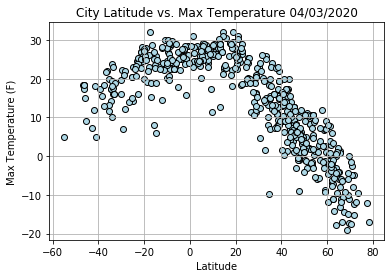

In [6]:
plt.scatter(city_weather_data["Lat"],city_weather_data["Max Temp"], edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Max Temperature 04/03/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (True)
plt.savefig("../output_data/Fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

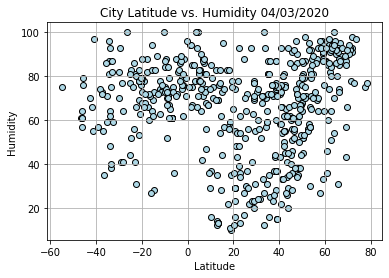

In [7]:
plt.scatter(city_weather_data["Lat"],city_weather_data["Humidity"], edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Humidity 04/03/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (True)
plt.savefig("../output_data/Fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

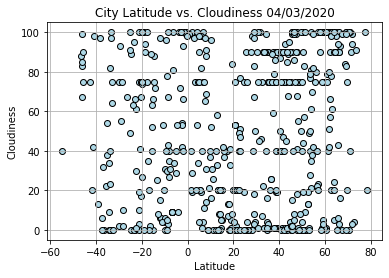

In [8]:
plt.scatter(city_weather_data["Lat"],city_weather_data["Cloudiness"], edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Cloudiness 04/03/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (True)
plt.savefig("../output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

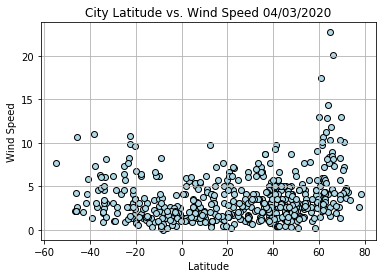

In [9]:
plt.scatter(city_weather_data["Lat"],city_weather_data["Wind Speed"], edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Wind Speed 04/03/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (True)
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
def Linear_regression (arg1, arg2, labelx, labely):
    plt.scatter(arg1,arg2)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    regression_data=st.linregress(arg1, arg2)
    slope = regression_data.slope
    intercept = regression_data.intercept
    regression_line = arg1 * slope + intercept
    plt.plot(arg1, regression_line, color="red")
    plt.show()    



In [11]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemi_data = city_weather_data.loc[city_weather_data["Lat"] >= 0]
Southerm_hemi_data = city_weather_data.loc[city_weather_data["Lat"] < 0]
print(len(Northern_hemi_data))
print(len(Southerm_hemi_data))


406
145


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

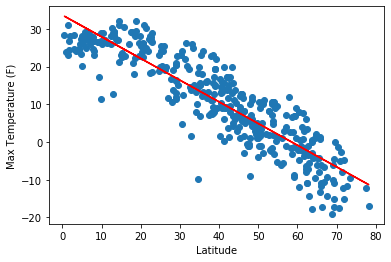

In [12]:
Linear_regression(Northern_hemi_data['Lat'], Northern_hemi_data['Max Temp'], 'Latitude', 'Max Temperature (F)')
#Analysis: Looking at the graph, the conclusion can be drawen that as latitude goes higher, the temperature gets lower

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

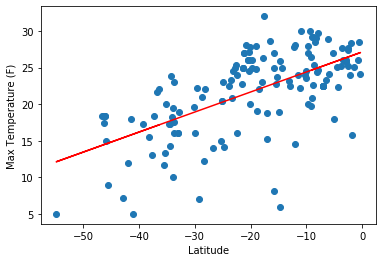

In [13]:
Linear_regression(Southerm_hemi_data['Lat'], Southerm_hemi_data['Max Temp'], 'Latitude', 'Max Temperature (F)')
#Analysis: The graphs shows that as we move away from the equator, the temperature drops.  The temp data points are above 
#          10 degree celcius so it must be summer in southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

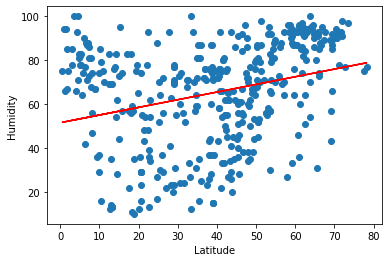

In [14]:
Linear_regression(Northern_hemi_data['Lat'], Northern_hemi_data['Humidity'], 'Latitude', 'Humidity')
#Analysis:  Humidity is determined by water bodies near land masses and the data points do not show close set with regression
#           line as data is scattered much widely

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

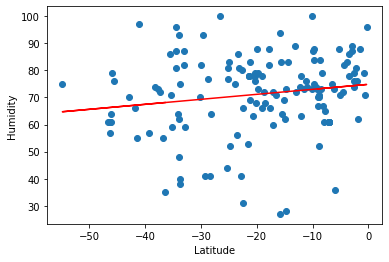

In [15]:
Linear_regression(Southerm_hemi_data['Lat'], Southerm_hemi_data['Humidity'], 'Latitude', 'Humidity')
#Analysis:  Humidity is determined by water bodies near land masses and the data points do not show close set with regression
#           line as data is scattered much widely.  Southern Hemisphere also has less data points for analysis

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

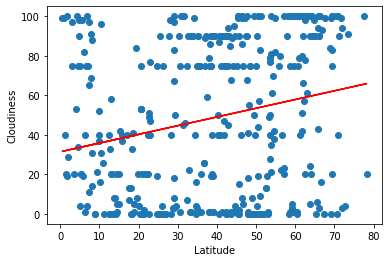

In [16]:
Linear_regression(Northern_hemi_data['Lat'], Northern_hemi_data['Cloudiness'], 'Latitude', 'Cloudiness')
#Analysis: Couldiness data is highly dispersed showing no real patterns of correlation to Latitude 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

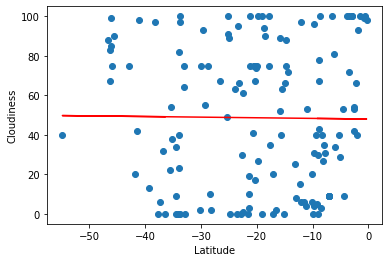

In [17]:
Linear_regression(Southerm_hemi_data['Lat'], Southerm_hemi_data['Cloudiness'], 'Latitude', 'Cloudiness')
#Analysis: Couldiness data is highly dispersed showing no real patterns of correlation to Latitude 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

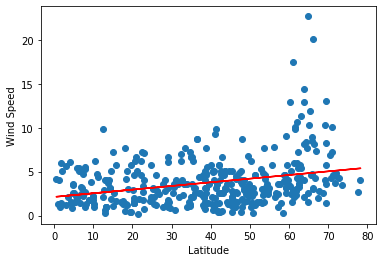

In [18]:
Linear_regression(Northern_hemi_data['Lat'], Northern_hemi_data['Wind Speed'], 'Latitude', 'Wind Speed')
#Analysis: Northern Hemisphere datas shows much lower winds across the land masses with a few outliers 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

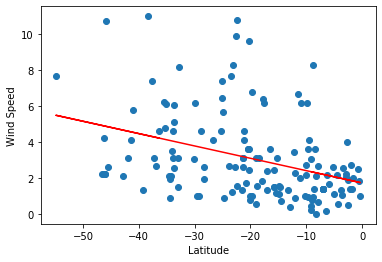

In [19]:
Linear_regression(Southerm_hemi_data['Lat'], Southerm_hemi_data['Wind Speed'], 'Latitude', 'Wind Speed')
#Analysis: Southern Hemisphere datas much concentrated data of winds below 10 MPH with wind speeds being 
#          much compact near the equator